In [59]:
import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

In [60]:
img = cv2.imread('./test_images/0b2a0c9175.jpg')
img.shape

(485, 736, 3)

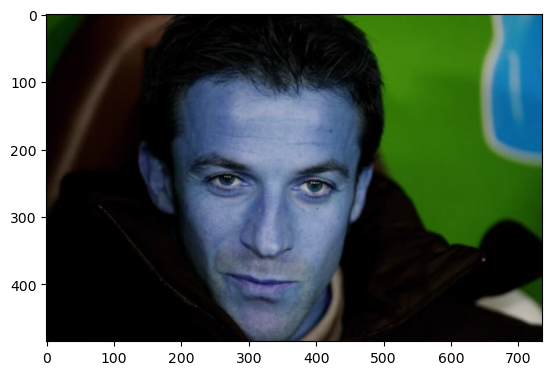

In [61]:
plt.imshow(img)

In [62]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.shape

(485, 736)

In [65]:
gray

array([[ 40,  40,  40, ..., 116, 115, 115],
       [ 40,  40,  40, ..., 116, 116, 115],
       [ 40,  40,  40, ..., 116, 116, 116],
       ...,
       [  0,   0,   0, ...,   2,   2,   2],
       [  0,   0,   0, ...,   2,   2,   2],
       [  0,   0,   0, ...,   2,   2,   2]], dtype=uint8)

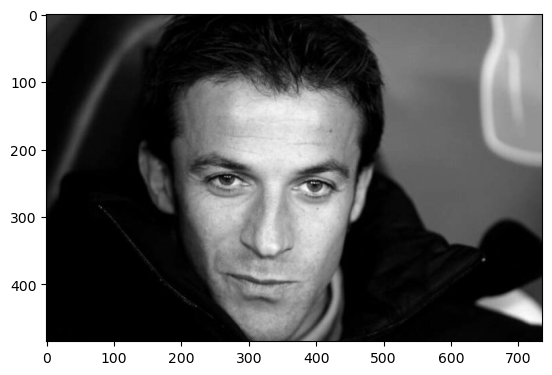

In [66]:
plt.imshow(gray, cmap='gray')


In [67]:
face_cascade = cv2.CascadeClassifier('./haarcascade/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('./haarcascade/haarcascade_eye.xml')

faces = face_cascade.detectMultiScale(gray, 1.3, 5)
faces

array([[185, 143, 297, 297]])

In [68]:
(x,y,w,h) = faces[0]
x,y,w,h

(185, 143, 297, 297)

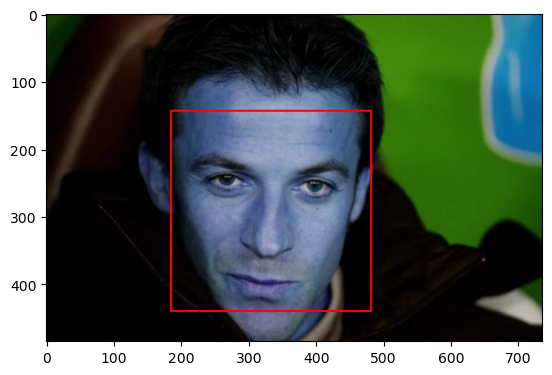

In [69]:
face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
plt.imshow(face_img)

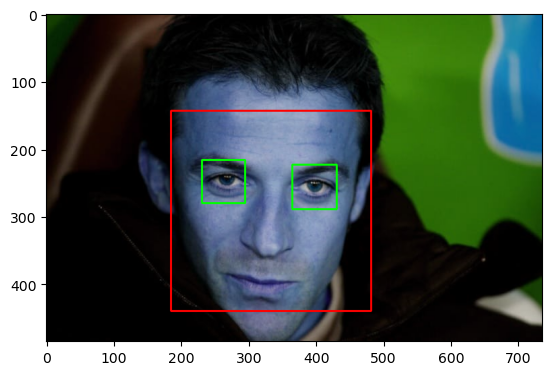

In [70]:
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
        

plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()

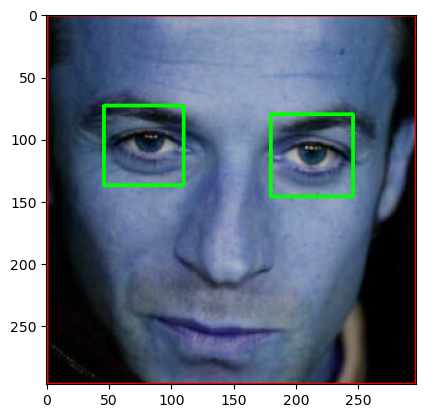

In [71]:
plt.imshow(roi_color, cmap = 'gray')

In [72]:
cropped_img = np.array(roi_color)
cropped_img.shape

(297, 297, 3)

In [73]:
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color

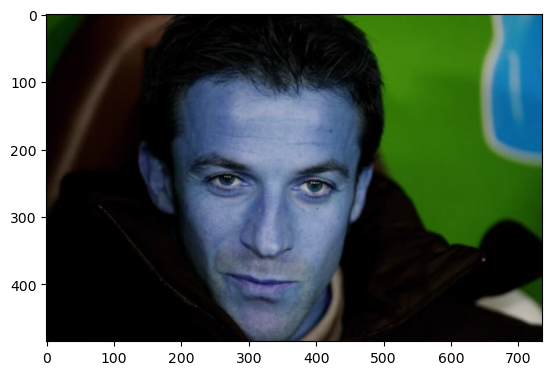

In [74]:
img = cv2.imread('./test_images/0b2a0c9175.jpg')
plt.imshow(img)

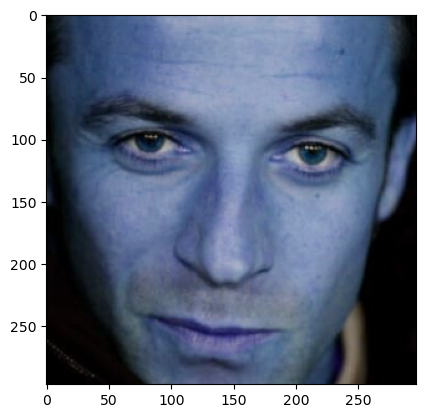

In [75]:
cropped_image = get_cropped_image_if_2_eyes('./test_images/0b2a0c9175.jpg')
plt.imshow(cropped_image)

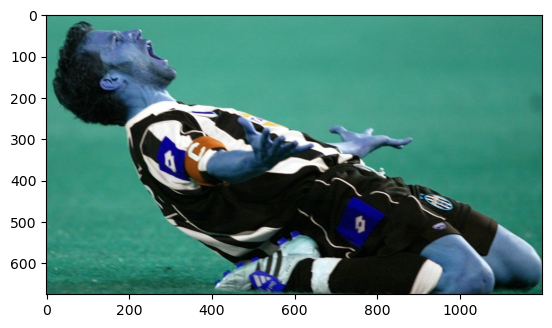

In [76]:
test_no_eyes = cv2.imread('./test_images/734145ac3e.jpg')
plt.imshow(test_no_eyes)

In [77]:
cropped_img_no_eyes = get_cropped_image_if_2_eyes('./test_images/734145ac3e.jpg')
cropped_img_no_eyes

In [78]:
path_to_data = "./football_golden_foot/"
path_to_cr_data = "./football_golden_foot/cropped/"

In [79]:
import os
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [80]:
img_dirs

['./football_golden_foot/alessandro_del_piero',
 './football_golden_foot/andreas_iniesta',
 './football_golden_foot/andriy_shevchenko',
 './football_golden_foot/cristiano_ronaldo',
 './football_golden_foot/francesco_totti',
 './football_golden_foot/gianlugi_buffon',
 './football_golden_foot/lionel_messi',
 './football_golden_foot/luka_modric']

In [81]:
import shutil
if os.path.exists(path_to_cr_data):
     shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

In [82]:
cropped_image_dirs = []
celebrity_file_names_dict = {}

for img_dir in img_dirs:
    count = 1
    celebrity_name = img_dir.split('/')[-1]
    print(celebrity_name)    
    celebrity_file_names_dict[celebrity_name] = [] 
    for entry in os.scandir(img_dir):
        roi_color = get_cropped_image_if_2_eyes(entry.path)
        if roi_color is not None:
            cropped_folder = path_to_cr_data + celebrity_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Cropped images in folder: ",cropped_folder)    
            cropped_file_name = celebrity_name + str(count) + ".png"
            cropped_file_path = cropped_folder + "/" + cropped_file_name 
            cv2.imwrite(cropped_file_path, roi_color)
            celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
            count += 1  
    

alessandro_del_piero
Cropped images in folder:  ./football_golden_foot/cropped/alessandro_del_piero
andreas_iniesta
Cropped images in folder:  ./football_golden_foot/cropped/andreas_iniesta
andriy_shevchenko
Cropped images in folder:  ./football_golden_foot/cropped/andriy_shevchenko
cristiano_ronaldo
Cropped images in folder:  ./football_golden_foot/cropped/cristiano_ronaldo
francesco_totti
Cropped images in folder:  ./football_golden_foot/cropped/francesco_totti
gianlugi_buffon
Cropped images in folder:  ./football_golden_foot/cropped/gianlugi_buffon
lionel_messi
Cropped images in folder:  ./football_golden_foot/cropped/lionel_messi
luka_modric
Cropped images in folder:  ./football_golden_foot/cropped/luka_modric


In [84]:
import numpy as np
import pywt
import cv2    

def w2d(img, mode='haar', level=1):
    imArray = img
    #Datatype conversions
    #convert to grayscale
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    #convert to float
    imArray =  np.float32(imArray)   
    imArray /= 255;
    # compute coefficients 
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0;  

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H

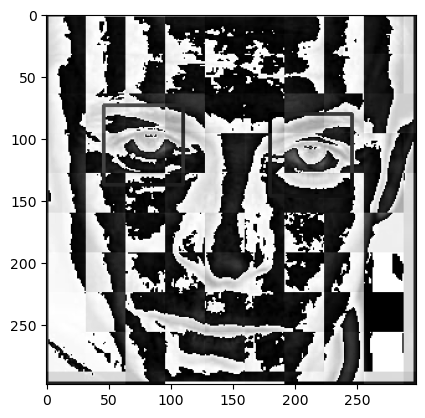

In [85]:
im_har = w2d(cropped_img,'db1',5)
plt.imshow(im_har, cmap='gray')

In [86]:
celebrity_file_names_dict

{'alessandro_del_piero': ['./football_golden_foot/cropped/alessandro_del_piero/alessandro_del_piero1.png',
  './football_golden_foot/cropped/alessandro_del_piero/alessandro_del_piero2.png',
  './football_golden_foot/cropped/alessandro_del_piero/alessandro_del_piero3.png',
  './football_golden_foot/cropped/alessandro_del_piero/alessandro_del_piero4.png',
  './football_golden_foot/cropped/alessandro_del_piero/alessandro_del_piero5.png',
  './football_golden_foot/cropped/alessandro_del_piero/alessandro_del_piero6.png',
  './football_golden_foot/cropped/alessandro_del_piero/alessandro_del_piero7.png',
  './football_golden_foot/cropped/alessandro_del_piero/alessandro_del_piero8.png',
  './football_golden_foot/cropped/alessandro_del_piero/alessandro_del_piero9.png',
  './football_golden_foot/cropped/alessandro_del_piero/alessandro_del_piero10.png',
  './football_golden_foot/cropped/alessandro_del_piero/alessandro_del_piero11.png',
  './football_golden_foot/cropped/alessandro_del_piero/alessa

In [87]:
class_dict = {}
count = 0
for celebrity_name in celebrity_file_names_dict.keys():
    class_dict[celebrity_name] = count
    count = count + 1
class_dict

{'alessandro_del_piero': 0,
 'andreas_iniesta': 1,
 'andriy_shevchenko': 2,
 'cristiano_ronaldo': 3,
 'francesco_totti': 4,
 'gianlugi_buffon': 5,
 'lionel_messi': 6,
 'luka_modric': 7}

In [88]:
x=[]
y=[]
for celebrity_name, training_files in celebrity_file_names_dict.items():
    for training_image in training_files:
        img = cv2.imread(training_image)
        if img is None:
            continue
        scalled_raw_img = cv2.resize(img,(32,32))
        img_har = w2d(img,'db1',5)
        scalled_img_har = cv2.resize(img_har, (32, 32))
        combined_img = np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))
        x.append(combined_img)
        y.append(class_dict[celebrity_name])  
        

In [89]:
len(x)

637

In [90]:
x = np.array(x).reshape(len(x),4096).astype(float)
x.shape

(637, 4096)

In [91]:
x[0]

array([ 38.,  34.,  33., ..., 155., 253., 250.])

In [92]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [102]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0)

pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel = 'rbf', C = 10))])
pipe.fit(x_train, y_train)
pipe.score(x_test, y_test)

0.7

In [103]:
print(classification_report(y_test, pipe.predict(x_test)))

              precision    recall  f1-score   support

           0       0.60      0.67      0.63        27
           1       0.54      0.70      0.61        10
           2       0.64      0.83      0.72        30
           3       0.70      0.74      0.72        19
           4       0.79      1.00      0.88        23
           5       1.00      0.48      0.65        21
           6       1.00      0.33      0.50         9
           7       0.75      0.57      0.65        21

    accuracy                           0.70       160
   macro avg       0.75      0.66      0.67       160
weighted avg       0.74      0.70      0.69       160



In [104]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [105]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}

In [107]:
scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(x_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.677105,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.375285,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.681360,{'logisticregression__C': 1}


In [108]:
best_estimators

{'svm': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('svc',
                  SVC(C=1, gamma='auto', kernel='linear', probability=True))]),
 'random_forest': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier',
                  RandomForestClassifier(n_estimators=10))]),
 'logistic_regression': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression',
                  LogisticRegression(C=1, solver='liblinear'))])}

In [109]:
best_estimators['svm'].score(x_test,y_test)

0.725

In [110]:
best_estimators['random_forest'].score(x_test,y_test)

0.35625

In [111]:
best_estimators['logistic_regression'].score(x_test,y_test)

0.70625

In [112]:
best_clf = best_estimators['svm']

In [113]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, best_clf.predict(x_test))
cm

array([[18,  1,  0,  0,  2,  3,  1,  2],
       [ 1,  8,  1,  0,  0,  0,  0,  0],
       [ 1,  4, 24,  0,  0,  0,  0,  1],
       [ 0,  0,  1, 16,  0,  0,  1,  1],
       [ 0,  0,  0,  0, 23,  0,  0,  0],
       [ 6,  3,  0,  1,  0, 10,  1,  0],
       [ 0,  1,  1,  0,  1,  1,  4,  1],
       [ 4,  1,  0,  1,  1,  1,  0, 13]], dtype=int64)

Text(95.72222222222221, 0.5, 'Truth')

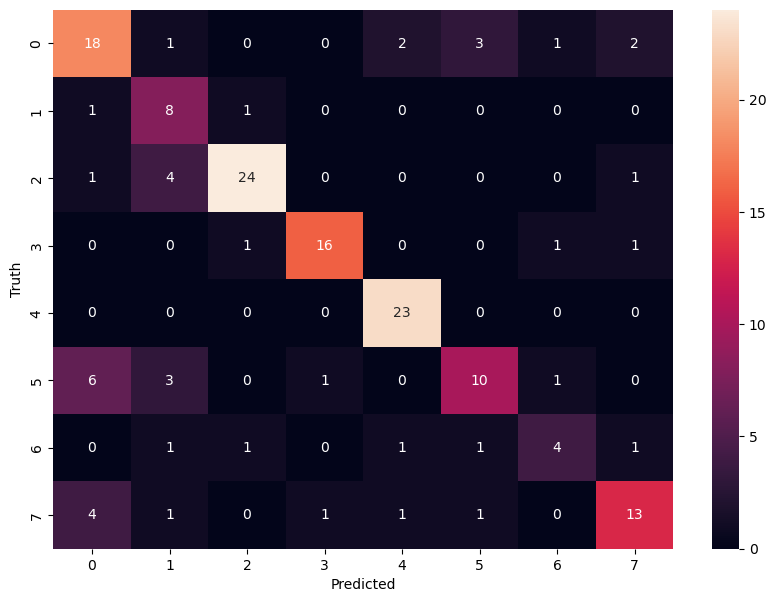

In [114]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [115]:
!pip install joblib
import joblib 
# Save the model as a pickle in a file 
joblib.dump(best_clf, 'saved_model.pkl') 

['saved_model.pkl']

In [116]:
import json
with open("class_dictionary.json","w") as f:
    f.write(json.dumps(class_dict))